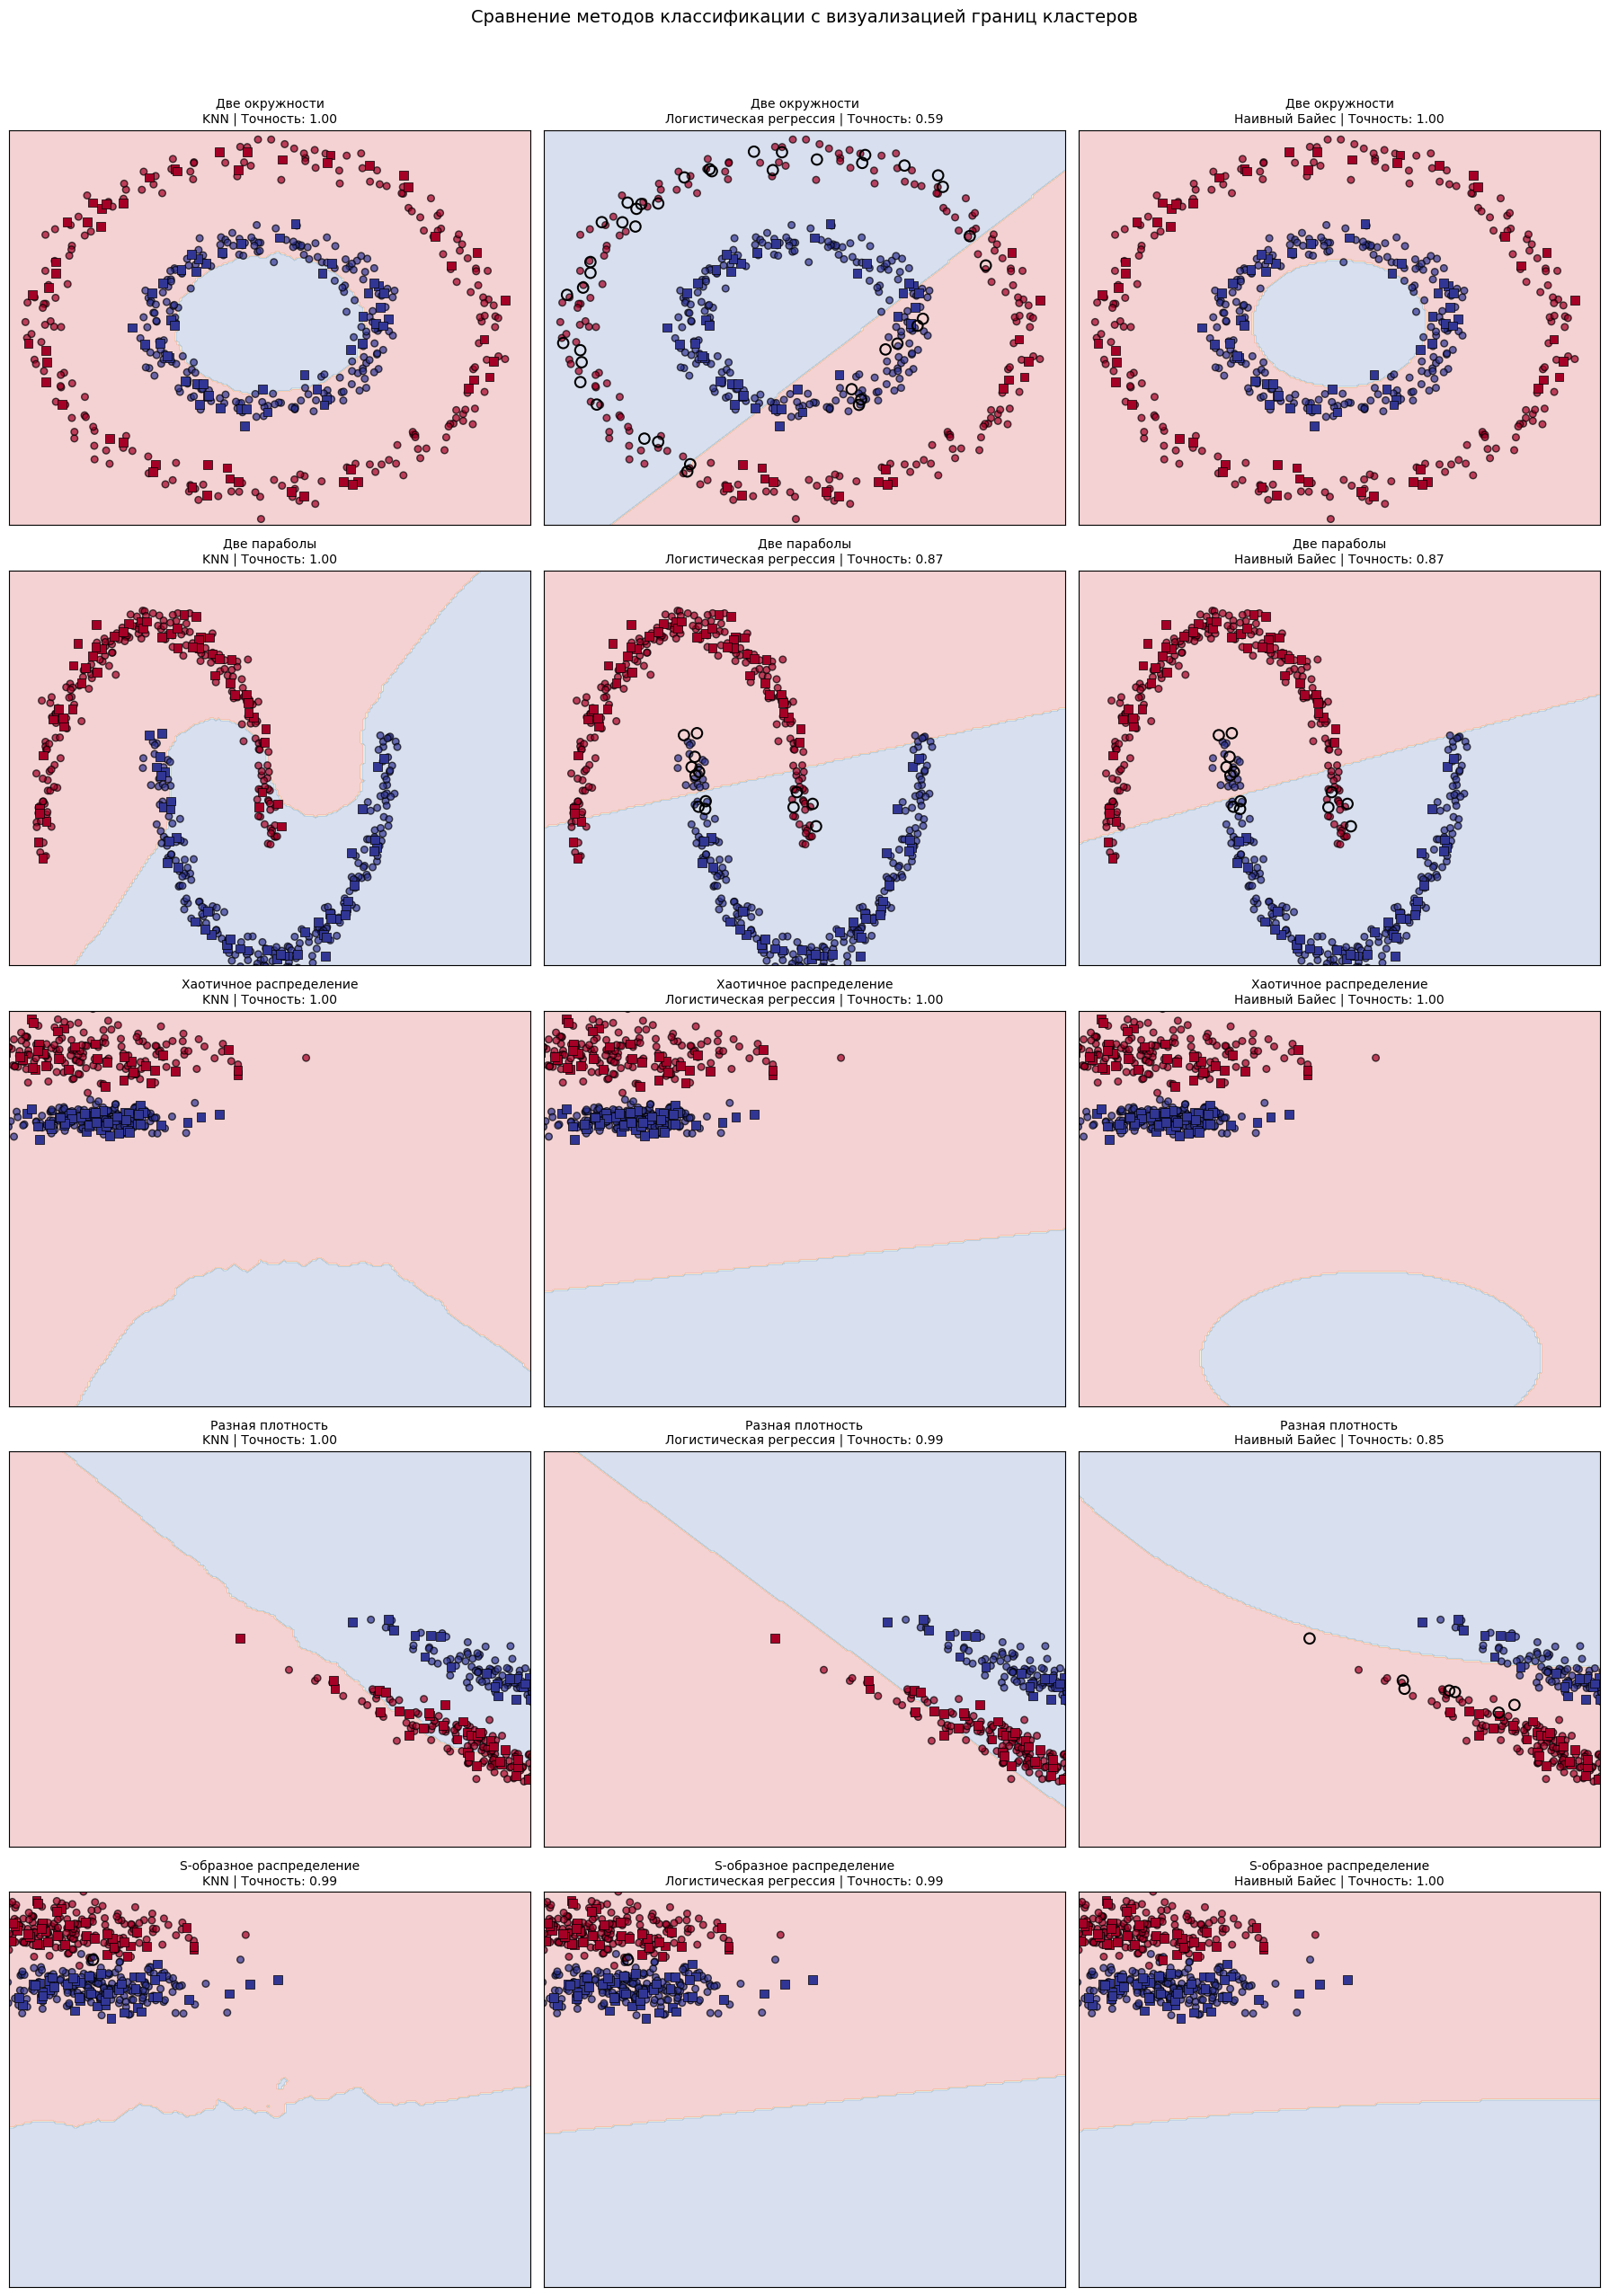

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

n_samples = 500
seed = 30


def generate_circles():
    return datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)


def generate_moons():
    return datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)


def generate_blobs():
    cluster_std = [1.0, 0.5]
    return datasets.make_blobs(n_samples=n_samples, cluster_std=cluster_std, random_state=seed, centers=2)


def generate_varied_density():
    random_state = 170
    x, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    x_aniso = np.dot(x, transformation)
    return (x_aniso, y)


def generate_s_shape():
    return datasets.make_blobs(n_samples=n_samples, random_state=seed, centers=2)


datasets = [
    ("Две окружности", generate_circles()),
    ("Две параболы", generate_moons()),
    ("Хаотичное распределение", generate_blobs()),
    ("Разная плотность", generate_varied_density()),
    ("S-образное распределение", generate_s_shape())
]

classifiers = [
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("Логистическая регрессия", LogisticRegression(max_iter=200)),
    ("Наивный Байес", GaussianNB())
]

fig, axes = plt.subplots(len(datasets), len(classifiers), figsize=(18, 25))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for row_idx, (data_name, (X, y)) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200))
    for col_idx, (clf_name, model) in enumerate(classifiers):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        ax = axes[row_idx, col_idx]
        ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.RdYlBu)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu,
                   edgecolor='k', s=30, alpha=0.7)
        correct = y_pred == y_test
        ax.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct],
                   cmap=plt.cm.RdYlBu, marker='s', s=50, edgecolor='k', linewidth=0.5)
        ax.scatter(X_test[~correct, 0], X_test[~correct, 1],
                   facecolors='none', edgecolors='black', s=70, linewidth=1.5)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f"{data_name}\n{clf_name} | Точность: {accuracy:.2f}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
plt.suptitle('Сравнение методов классификации с визуализацией границ кластеров', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()